
## Project 4: Churn Prediction Modelling 

---

In [1]:
import pandas as pd

data = r"/Users/meisan/Documents/GitHub/GA-DAT9-Projects1/R_Morgan_Project4_Files/telecom_data.csv"
df = pd.read_csv(data)
df.head()

,account_length,num_of_voice_mail_messages,total_day_calls,total_day_charge,total_eve_calls,total_eve_charge,total_night_calls,total_night_charge,total_intl_calls,total_intl_charge,number_customer_service_calls,international_plan_n,voice_mail_plan_n,area_code_408,area_code_415,area_code_510,churn_n
0,128,25,110,45.07,99,16.78,91,11.01,3,2.70,1,0,1,0,1,0,0
1,107,26,123,27.47,103,16.62,103,11.45,3,3.70,1,0,1,0,1,0,0
2,137,0,114,41.38,110,10.30,104,7.32,5,3.29,0,0,0,0,1,0,0
3,84,0,71,50.90,88,5.26,89,8.86,7,1.78,2,1,0,1,0,0,0
4,75,0,113,28.34,122,12.61,121,8.41,3,2.73,3,1,0,0,1,0,0


In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

% matplotlib inline

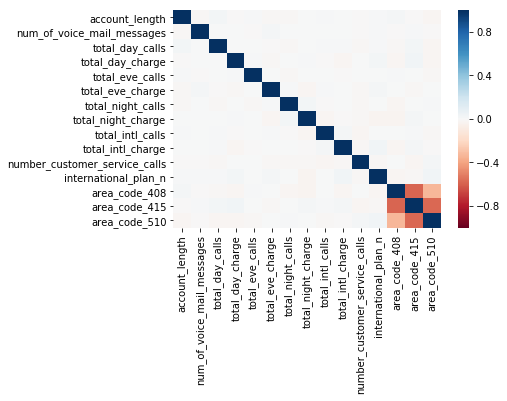

In [3]:
#establish list of features saved from EDA, print heatmap to check for colinearity between features
feature_names = ['account_length','num_of_voice_mail_messages','total_day_calls','total_day_charge',
                 'total_eve_calls','total_eve_charge','total_night_calls','total_night_charge',
                 'total_intl_calls','total_intl_charge','number_customer_service_calls','international_plan_n',
                 'area_code_408','area_code_415','area_code_510']

predictors = ['account_length','total_intl_charge','number_customer_service_calls',
              'total_day_calls','area_code_408','area_code_415','area_code_510']

X = df[feature_names]
y = df['churn_n']

sns.heatmap(X.corr(),vmin=-1,vmax=1,center=0,cmap='RdBu')

In [4]:
from sklearn.preprocessing import StandardScaler

ss = StandardScaler()

# use the "fit_transform" function to standardize the X design matrix
Xs = ss.fit_transform(X)

#### Use Smote-Tomek to resample data

In [5]:
#import counter to check shapes of original and resampled datasets
from collections import Counter
from imblearn.combine import SMOTETomek
smt = SMOTETomek(random_state=123)
X_res, y_res = smt.fit_sample(Xs, y)
print('Original dataset shape {}'.format(Counter(y)))
print('Resampled dataset shape {}'.format(Counter(y_res)))
X_samp = pd.DataFrame(X_res, columns = feature_names)
y_samp = pd.DataFrame(y_res, columns = ['churn_n'])
#default settings resulted in heavy use of SMOTE to balance data.

Original dataset shape Counter({0: 4293, 1: 707})
Resampled dataset shape Counter({0: 4292, 1: 4292})


In [6]:
X_samp.head()

,account_length,num_of_voice_mail_messages,total_day_calls,total_day_charge,total_eve_calls,total_eve_charge,total_night_calls,total_night_charge,total_intl_calls,total_intl_charge,number_customer_service_calls,international_plan_n,area_code_408,area_code_415,area_code_510
0,0.698941,1.273145,0.502824,1.574074,-0.060077,-0.063849,-0.446928,0.876286,-0.584236,-0.095509,-0.436676,-0.323240,-0.580122,1.002002,-0.576119
1,0.169849,1.346973,1.158422,-0.347082,0.141693,-0.101089,0.154374,1.069818,-0.584236,1.245982,-0.436676,-0.323240,-0.580122,1.002002,-0.576119
2,0.925695,-0.572549,0.704546,1.171286,0.494791,-1.572084,0.204483,-0.746737,0.229917,0.695971,-1.202236,-0.323240,-0.580122,1.002002,-0.576119
3,-0.409634,-0.572549,-1.463971,2.210457,-0.614946,-2.745155,-0.547145,-0.069377,1.044069,-1.329681,0.328885,3.093675,1.723777,-0.998002,-0.576119
4,-0.636388,-0.572549,0.654116,-0.252115,1.100103,-1.034426,1.056327,-0.267307,-0.584236,-0.055264,1.094445,3.093675,-0.580122,1.002002,-0.576119


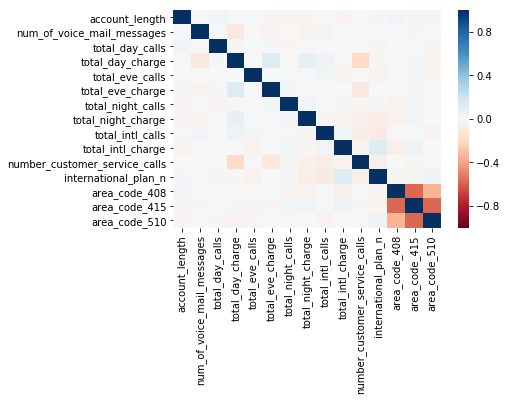

In [7]:
#check to see if sampling has affected colinearity.
sns.heatmap(X_samp.corr(),vmin=-1,vmax=1,center=0,cmap='RdBu')

### Logisitic Regression Modelling

In [8]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split


# create training and testing vars, check shape
X_train, X_test, y_train, y_test = train_test_split(X_res, y_res, test_size=0.2,random_state=123)
print (X_train.shape, y_train.shape)
print (X_test.shape, y_test.shape)

(6867, 15) (6867,)
(1717, 15) (1717,)


In [9]:
# Make an instance of a LinearRegression object.
lr = LogisticRegression()
type(lr)

sklearn.linear_model.logistic.LogisticRegression

In [10]:
#fit model, print coefficients
model = lr.fit(X_train, y_train)
print(lr.intercept_)
print(lr.coef_)

[-0.68334051]
[[ 0.06034927 -0.46044573  0.04311776  0.77387899 -0.01223031  0.43202967
  -0.06308781  0.25381826 -0.1568363   0.23789095  0.87602113  0.71344466
   0.02847505 -0.03032511  0.00648021]]


In [11]:
print(feature_names[3],',',feature_names[10],',',feature_names[11])

total_day_charge , number_customer_service_calls , international_plan_n


From an initial viewing, the above metrics have higher coefficients associated with them. 

In [12]:
#assign array with predicted 'y' results to 'y_predicted'
y_pred = model.predict(X_test)
y_pred

array([0, 1, 1, ..., 1, 0, 1])

In [14]:
from sklearn import metrics
metrics.confusion_matrix(y_true=y_test, y_pred=y_pred_prob > .5)

array([[660, 183],
       [192, 682]])

In [15]:
# calculate the fpr and tpr for all thresholds of the classification
probs = model.predict_proba(X_test)
preds = probs[:,1]
fpr, tpr, threshold = metrics.roc_curve(y_test, preds)
roc_auc = metrics.auc(fpr, tpr)
roc_auc

0.8555217146998706

In [16]:
#print accuracy score of model
print('Test Score:', model.score(X_test,y_test))
print('Train Score:', model.score(X_train,y_train))

Test Score: 0.7815958066394875
Train Score: 0.7849133537206932


In [ ]:
y_pred_train = model.predict(X_train)
print('RandForest Testing Accuracy:', metrics.accuracy_score(y_test, y_pred))
print('RandForest Training Accuracy:',metrics.accuracy_score(y_train, y_pred_train))
print('---Confusion Matrix---')
print(metrics.confusion_matrix(y_true=y_test, y_pred=preds > .5))

> Scores are close, indicating model is not overfitted.

### Elastic Net Regularisation

In [17]:
#define a range of alphas for optimising enet
alpha_range = 10.**np.arange(-2, 3)
alpha_range

array([1.e-02, 1.e-01, 1.e+00, 1.e+01, 1.e+02])

In [18]:
from sklearn.linear_model import SGDClassifier

opt_auc = 0
#find optimal auc through optimal alpha, use coefficients for feature selection
for n in alpha_range:
    clf = SGDClassifier(penalty='elasticnet',alpha=n,max_iter=1000, loss = 'log',random_state=123)
    clf_model = clf.fit(X_train, y_train)
    predicted_enet = clf.predict_proba(X_test)
    preds = predicted_enet[:,1]
    fpr_enet, tpr_enet, threshold_enet = metrics.roc_curve(y_test, preds)
    roc_auc_enet = metrics.auc(fpr_enet, tpr_enet)
    #determine the optimum alpha by storing 'n' and its 
    #associated metrics if AUC is larger than AUC for previous n.
    if roc_auc_enet >= opt_auc:
        opt_preds = preds
        opt_auc = roc_auc_enet
        opt_int = clf.intercept_
        opt_coef = clf.coef_
        opt_alpha = n
print('AUC for optimal alpha: ', opt_auc)    
print('Optimal alpha: ', opt_alpha)    
print('Intercept: ', opt_int)
print('coefficients: ',opt_coef)

AUC for optimal alpha:  0.8556031499140859
Optimal alpha:  0.01
Intercept:  [-0.61357972]
coefficients:  [[ 0.04362697 -0.40886348  0.03083594  0.69823179  0.          0.38294732
  -0.0473364   0.22019008 -0.13755107  0.20488582  0.78566804  0.65239969
   0.01523696 -0.02900043  0.        ]]


#### Elastic net feature removal
> elastic net regularisation deprecated the following features:

> __1. 'total_eve_calls'__

> __2. 'area_code_510'__

> We will now use the optimal alpha value of 0.01 to re-fit our model and observe AUC.

In [19]:
clf_2 = SGDClassifier(penalty='elasticnet',alpha=0.01,max_iter=1000, loss = 'log',random_state=123)
clf_model_2 = clf_2.fit(X_train, y_train)
predicted_enet_2 = clf_2.predict_proba(X_test)
print(clf_model_2.intercept_)
print(clf_model_2.coef_)

[-0.61357972]
[[ 0.04362697 -0.40886348  0.03083594  0.69823179  0.          0.38294732
  -0.0473364   0.22019008 -0.13755107  0.20488582  0.78566804  0.65239969
   0.01523696 -0.02900043  0.        ]]


In [20]:
preds = predicted_enet_2[:,1]
fpr_enet_2, tpr_enet_2, threshold_enet_2 = metrics.roc_curve(y_test, preds)
roc_auc_enet_2 = metrics.auc(fpr_enet_2, tpr_enet_2)
roc_auc_enet_2

0.8556031499140859

In [21]:
#performs worse with elasticnet
metrics.confusion_matrix(y_true=y_test, y_pred=preds > .5)

array([[660, 183],
       [188, 686]])

In [22]:
print('Training Score:', clf_model_2.score(X_train,y_train))
print('Test Score:', clf_model_2.score(X_test,y_test))

Training Score: 0.7856414737148683
Test Score: 0.7839254513686663


### LogReg re-fit (removing features reduced from ENET)

In [23]:
#re-fit model, removing features highlighted from elasticnet
ss = StandardScaler()
Xs = ss.fit_transform(X)

enet_predictors = ['account_length','num_of_voice_mail_messages','total_day_calls','total_day_charge',
                 'total_eve_charge','total_night_calls','total_night_charge',
                 'total_intl_calls','total_intl_charge','number_customer_service_calls','international_plan_n',
                 'area_code_408','area_code_415']
#assign enet predictors to balanced X data
X_samp_f = X_samp[enet_predictors]

#split data
X_train, X_test, y_train, y_test = train_test_split(X_samp_f, y_res, test_size=0.2,random_state=123)


lr = LogisticRegression()
model_2 = lr.fit(X_train, y_train)

y_pred = lr.predict(X_test)

#calculate AUC of new model
probs = model_2.predict_proba(X_test)
preds = probs[:,1]
fpr_2, tpr_2, threshold_2 = metrics.roc_curve(y_test, preds)
roc_auc_2 = metrics.auc(fpr_2, tpr_2)
roc_auc_2

0.855561075053408

In [24]:
#print accuracy score of model
print('Test Score:', model_2.score(X_test,y_test))
print('Training Score:', model_2.score(X_train,y_train))

Test Score: 0.7833430401863716
Training Score: 0.7846221057230232


In [25]:
metrics.confusion_matrix(y_true=y_test, y_pred=preds > .5)

array([[662, 181],
       [191, 683]])

### K-fold cross validation

no_folds    4.000000
scores      0.785531
Name: 2, dtype: float64


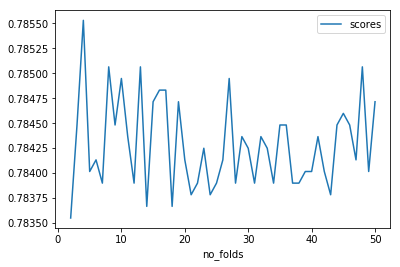

In [26]:
from sklearn.model_selection import cross_val_predict
from sklearn.model_selection import cross_val_score
from sklearn import metrics

score_list = []
no_folds = []
for n in range(2,51):
    predicted = cross_val_predict(model, X_samp_f, y_res, cv=n)
    score = metrics.accuracy_score(y_res, predicted)
    no_folds.append(n)
    score_list.append(score)

s = {'no_folds':no_folds, 'scores':score_list}
n_scores = pd.DataFrame(s)
print(n_scores.iloc[n_scores['scores'].values.argmax()])
n_scores.plot('no_folds', 'scores')

#### Optimal folds appears to be 4.

### KNN Classification 

knn_acc           0.950495
num_neighbours    2.000000
Name: 0, dtype: float64


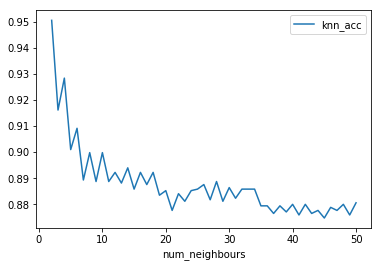

In [27]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
#looped function for calculating accuracy for various neighbours
knn_acc = []
num_neighbours = []

for n in range(2,51):
    knn = KNeighborsClassifier(n_neighbors=n)
    knn_model = knn.fit(X_train, y_train)
    predicted_knn = knn_model.predict(X_test)
    knn_acc.append(accuracy_score(y_test, predicted_knn))
    num_neighbours.append(n)
    
s = {'knn_acc':knn_acc, 'num_neighbours':num_neighbours}
knn_scores = pd.DataFrame(s)
print(knn_scores.iloc[knn_scores['knn_acc'].values.argmax()])
knn_scores.plot('num_neighbours', 'knn_acc')

#### Optimal number of neigbours is 2. We will use n = 2 for computing ROC & AUC.

In [28]:
knn_13 = KNeighborsClassifier(n_neighbors=2)
knn_model = knn.fit(X_train, y_train)
predicted_knn = knn.predict_proba(X_test)
preds = predicted_knn[:,1]
fpr_knn, tpr_knn, threshold_knn = metrics.roc_curve(y_test, preds)
roc_auc_knn = metrics.auc(fpr_knn, tpr_knn)
roc_auc_knn

0.9429878851546319

In [29]:
print('Test Score:', knn_model.score(X_test,y_test))
print('Training Score:', knn_model.score(X_train,y_train))

Test Score: 0.8806057076295865
Training Score: 0.8572884811416922


In [30]:
metrics.confusion_matrix(y_true=y_test, y_pred=preds > .5)

array([[708, 135],
       [ 70, 804]])

### Decision Tree Model

In [31]:
from sklearn import tree
clf_tree = tree.DecisionTreeClassifier()
dtree_model = clf_tree.fit(X_train, y_train)
predicted_tree = clf_tree.predict_proba(X_test)
preds = predicted_tree[:,1]
fpr_tree, tpr_tree, threshold_tree = metrics.roc_curve(y_test, preds)
roc_auc_tree = metrics.auc(fpr_tree, tpr_tree)
roc_auc_tree

0.9371632314578804

In [32]:
import graphviz 
dot_data = tree.export_graphviz(dtree_model, out_file=None) 
graph = graphviz.Source(dot_data) 
#graph.render("Telco Churn") 

In [ ]:
y_pred = d_tree_model.predict(X_test)
y_pred_train = dtree_model.predict(X_train)
print('RandForest Testing Accuracy:', metrics.accuracy_score(y_test, y_pred))
print('RandForest Training Accuracy:',metrics.accuracy_score(y_train, y_pred_train))
print('---Confusion Matrix---')
print(metrics.confusion_matrix(y_true=y_test, y_pred=preds > .5))

### Random Forest Model

In [57]:
#split data according to original dataset

X_train, X_test, y_train, y_test = train_test_split(X_res, y_res, test_size=0.2,random_state=123)

#Import Random Forest Model
from sklearn.ensemble import RandomForestClassifier

#Create a Gaussian Classifier
rf_clf = RandomForestClassifier(n_estimators=100)

#Train the model using the training sets y_pred=clf.predict(X_test)
rf_model = rf_clf.fit(X_train,y_train)

rf_pred_prob = rf_model.predict_proba(X_test)
preds = rf_pred_prob[:,1]
fpr_rf, tpr_rf, threshold_rf = metrics.roc_curve(y_test, preds)
roc_auc_rf = metrics.auc(fpr_rf, tpr_rf)
roc_auc_rf

0.9950500962292782

In [58]:
rf_y_pred = rf_clf.predict(X_test)
rf_pred_train = rf_clf.predict(X_train)
print('RandForest Testing Accuracy:', metrics.accuracy_score(y_test, rf_y_pred))
print('RandForest Training Accuracy:',metrics.accuracy_score(y_train, rf_pred_train))
print('---Confusion Matrix---')
print(metrics.confusion_matrix(y_true=y_test, y_pred=preds > .5))

RandForest Testing Accuracy: 0.9603960396039604
RandForest Training Accuracy: 1.0
---Confusion Matrix---
[[821  22]
 [ 46 828]]


### Feature Important from Random Forest

In [59]:
feature_imp = pd.Series(rf_model.feature_importances_,index=feature_names).sort_values(ascending=False)
feature_imp

total_day_charge                 0.217376
number_customer_service_calls    0.177049
international_plan_n             0.098480
total_intl_calls                 0.091702
total_eve_charge                 0.079098
total_intl_charge                0.055705
total_night_charge               0.055460
num_of_voice_mail_messages       0.045701
account_length                   0.041179
total_eve_calls                  0.040957
total_night_calls                0.040030
total_day_calls                  0.038498
area_code_415                    0.007213
area_code_408                    0.005797
area_code_510                    0.005754
dtype: float64

### Cross-validate All models

In [60]:
#cross-validate all models with optimal number of folds - 4 folds.
cv_knn = cross_val_score(knn_model, X_res, y_res, cv=4, scoring='roc_auc').mean()
cv_lr = cross_val_score(model, X_res, y_res, cv=4, scoring='roc_auc').mean()
cv_lr_2nd = cross_val_score(model_2, X_samp_f, y_res, cv=4, scoring='roc_auc').mean()
cv_enet = cross_val_score(clf_model_2, X_res, y_res, cv=4, scoring='roc_auc').mean()
cv_dtree = cross_val_score(dtree_model, X_samp_f, y_res, cv=4, scoring='roc_auc').mean()
cv_rf = cross_val_score(rf_model, X_samp_f, y_res, cv=4, scoring='roc_auc').mean()

print('Cross Validated score for KNN model is', cv_knn)
print('Cross Validated score for 1st LogReg model is', cv_lr)
print('Cross Validated score for Refitted LogReg model is', cv_lr_2nd) 
print('Cross Validated score for 2nd ElasticNet model is', cv_enet)
print('Cross Validated score for Decision Tree model is', cv_dtree)
print('Cross Validated score for Random Forest model is', cv_rf)

Cross Validated score for KNN model is 0.9256208477333586
Cross Validated score for 1st LogReg model is 0.8415368239660427
Cross Validated score for Refitted LogReg model is 0.841789792491981
Cross Validated score for 2nd ElasticNet model is 0.8417226961190067
Cross Validated score for Decision Tree model is 0.9126281453867661
Cross Validated score for Random Forest model is 0.9932509517262225


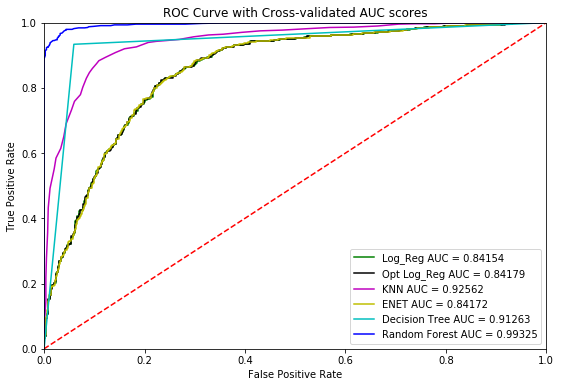

In [61]:
#Plot AUC for all models
fig, ax = plt.subplots(figsize=(9, 6))
plt.title('ROC Curve with Cross-validated AUC scores')
plt.plot(fpr, tpr, 'g', label = 'Log_Reg AUC = %0.5f' % cv_lr)
plt.plot(fpr_2, tpr_2, 'k', label = 'Opt Log_Reg AUC = %0.5f' % cv_lr_2nd)
plt.plot(fpr_knn, tpr_knn, 'm', label = 'KNN AUC = %0.5f' % cv_knn)
plt.plot(fpr_enet_2, tpr_enet_2, 'y', label = 'ENET AUC = %0.5f' % cv_enet)
plt.plot(fpr_tree, tpr_tree, 'c', label = 'Decision Tree AUC = %0.5f' % cv_dtree)
plt.plot(fpr_rf, tpr_rf, 'b', label = 'Random Forest AUC = %0.5f' % cv_rf)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

> Observing AUC's of our models, KNN and Decision tree models have better discrimination ability.